# Multiple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

## Read data from CSV file and select some features

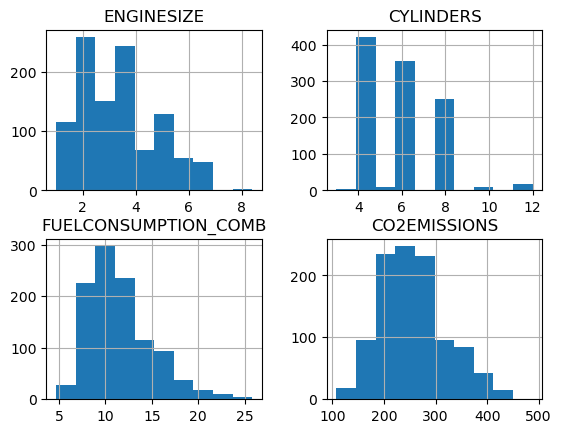

In [2]:
df = pd.read_csv("FuelConsumption.csv")
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
vis = cdf.hist()
plt.show()

## Spilit data to Train and Test

In [3]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print (len(train), len(test))

847 220


## Train the model with the selected data

In [4]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(train[[ "CO2EMISSIONS"]])
regr.fit(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]], train[[ "CO2EMISSIONS"]])
coefficients = regr.coef_
intercept = regr.intercept_
print (f"Coefficients are: {coefficients}")
print (f"intercept is: {intercept}")

Coefficients are: [[10.77184996  7.44016215  9.55754139]]
intercept is: [65.86544239]


## Evaluation and Prediction

In [6]:
x = test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
y = test[[ "CO2EMISSIONS"]]
y_hat = regr.predict(x)
print ("Residual sum of squares: %.3f" % np.mean((y_hat - y) ** 2))
print ("Variance score: %.3f" % regr.score(x, y))

Residual sum of squares: 508.669
Variance score: 0.869


## Practice with another features to see the result

In [7]:
# creating new DF with new features
df_2 = pd.read_csv("FuelConsumption.csv")
cdf_2 = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "CO2EMISSIONS"]]
msk_2 = np.random.rand(len(df)) < 0.8
train_2 = cdf_2[msk]
test_2 = cdf_2[~msk]

# train the new model
regr = linear_model.LinearRegression()
x = train_2[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
y = train_2[[ "CO2EMISSIONS"]]
regr.fit(x, y)
coefficients_2 = regr.coef_
intercept_2 = regr.intercept_
print (f"Coefficients are: {coefficients_2}")
print (f"intercept is: {intercept_2}")

# evaluation
x_test = test_2[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
y_test = test_2[[ "CO2EMISSIONS"]]
y_hat_2 = regr.predict(x_test)
print ("Residual sum of squares: %.3f" % np.mean((y_hat_2 - y_test) ** 2))
print ("Variance score: %.3f" % regr.score(x_test, y_test))

Coefficients are: [[10.8033831   7.35158942  5.46209682  4.02489643]]
intercept is: [66.19507748]
Residual sum of squares: 508.090
Variance score: 0.869
